In [2]:
import pandas as pd
from io import StringIO

In [3]:
csv_data = '''A,B,C,D
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              0.0,11.0,12.0,'''

In [4]:
df = pd.read_csv(StringIO(csv_data))

In [5]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [6]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [7]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [  0.,  11.,  12.,  nan]])

In [8]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [10]:
from sklearn.preprocessing import Imputer

In [11]:
imr = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

In [12]:
#处理类别数据
df = pd.DataFrame([['green','M',10.1,'calss1'],
                   ['red','L',13.5,'calss2'],
                   ['blue','XL',15.3,'calss1']])

In [13]:
df.columns = ['color','size','price','classlabel']

In [14]:
df

,color,size,price,classlabel
0,green,M,10.1,calss1
1,red,L,13.5,calss2
2,blue,XL,15.3,calss1


In [15]:
size_mapping = {'XL':3,'L':2,'M':1}

In [16]:
df['size'] = df['size'].map(size_mapping)

In [17]:
df

,color,size,price,classlabel
0,green,1,10.1,calss1
1,red,2,13.5,calss2
2,blue,3,15.3,calss1


In [18]:
import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'calss1': 0, 'calss2': 1}

In [19]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [20]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [21]:
inv_class_mapping = {v:k for k,v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,calss1
1,red,2,13.5,calss2
2,blue,3,15.3,calss1


In [22]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [23]:
#独热编码
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [25]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [26]:
#葡萄酒数据集
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/\
machine-learning-databases/wine/wine.data',header = None)
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash',
                   'Alcalinity of ash','Magnesium','Total phenols',
                   'Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                   'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
print('Class labels',np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [27]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
from sklearn.cross_validation import train_test_split
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
#归一化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [30]:
#标准化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [31]:
#L1正则化
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty = 'l1')
lr = LogisticRegression(penalty = 'l1',C = 0.1)
lr.fit(X_train_std,y_train)
print('Test accuracy:',lr.score(X_train_std,y_train))


Test accuracy: 0.983870967742


In [32]:
print('Test accuracy:',lr.score(X_test_std,y_test))

Test accuracy: 0.981481481481


In [33]:
lr.intercept_

array([-0.38378985, -0.15814248, -0.70042856])

In [34]:
lr.coef_

array([[ 0.28007018,  0.        ,  0.        , -0.02787006,  0.        ,
         0.        ,  0.71002208,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.236615  ],
       [-0.64374995, -0.06895404, -0.05719133,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92721374,
         0.05978607,  0.        , -0.37104077],
       [ 0.        ,  0.06157573,  0.        ,  0.        ,  0.        ,
         0.        , -0.63566961,  0.        ,  0.        ,  0.4979197 ,
        -0.35827101, -0.57151785,  0.        ]])

In [35]:
#序列后向选择算法SBS

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
class SBS():
    def __init__(self,estimator,k_features,scoring = accuracy_score,
                 test_size = 0.25,random_state = 1):
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state
    def fit(self,X,y):
        X_train,X_test,y_train,y_test = \
        train_test_split(X,y,test_size = self.test_size,random_state = self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train,X_test,y_train,y_test,self.indices_)
        self.scores_ = [score]
        
        while dim >self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_,r = dim-1):
                score = self._calc_score(X_train,X_test,y_train,y_test,p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_scores_ = self.scores_[-1]
        
        return self
    
    def transform(self,X):
        return X[:,self.indices_]
    
    def _calc_score(self,X_train,X_test,y_train,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score

In [36]:
#SBS用于KNN
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors = 2)
sbs = SBS(knn,k_features = 1)
sbs.fit(X_train_std,y_train)

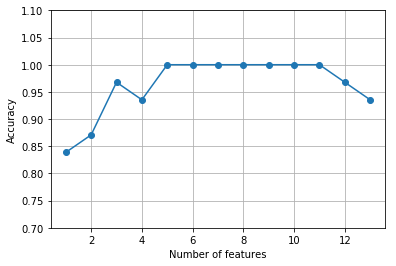

In [37]:
#绘制KNN分类器分类准确率
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker = 'o')
plt.ylim([0.7,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [38]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [39]:
knn.fit(X_train_std,y_train)
print('Training accuracy:',knn.score(X_train_std,y_train))

Training accuracy: 0.983870967742


In [42]:
print('Test accuracy:',knn.score(X_test_std,y_test))

Test accuracy: 0.944444444444


In [43]:
knn.fit(X_train_std[:,k5],y_train)
print('Training accuracy:',knn.score(X_train_std[:,k5],y_train))
print('Test accuracy:',knn.score(X_test_std[:,k5],y_test))

Training accuracy: 0.959677419355
Test accuracy: 0.962962962963


In [45]:
#通过随机森林判断特征的重要性
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 10000,random_state = 0,n_jobs = -1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1,30,feat_labels[f],importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


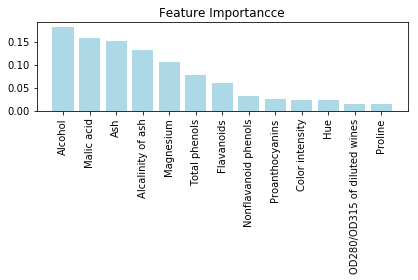

In [47]:
plt.title('Feature Importancce')
plt.bar(range(X_train.shape[1]),importances[indices],color = 'lightblue',align = 'center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation = 90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [48]:
X_selected = forest.transform(X_train,threshold = 0.15)
X_selected.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 3)